# Predicting Customer Churn 

## Business Problem and Overview

####  Overview

This project will be using the Telco Customer Churn dataset. This data is available in free in the Kaggle website.The dataset provides information on customers who churned or exited, services that each customer had signed up for, demographic information and customer account information such as type of contract, charges and payment method. 

####  Problem

The problem is that customers are churning or switching to get services from competitors. As a result of this project we can predict which customers are likely to churn or not. The business can use this information to minimize the number of customers who churn. 

This is Classification problem. The target variable is `Churn`, which shows which customer churned or did not churn.

#### Goal

The project's goal is to predict if a customer will churn or not, by using a Classification model with an accuracy score of over 0.73. The metrics used will mainly be the accuracy score. In addition the confusion matrix will be used. 

To help achieve this goal the 5-fold Cross Validation will be used to compare the accuracy score of different models. The Grid Search CV will be used to fine tune the models and get the final model with the best accuracy score. 

#### Research questions

What do we learn from the exploratory data analysis?

What happened to the accuracy score when the grid search cross validation was used?

What is the best model to use? 

#### Motivation and Interest
Businesses spend alot of money on marketing and marketing strategy to get potential customers. 

It is therefore critical that they are able to retain these customers and not lose their customers to competitors. 

This project is useful to businesses because it helps them see which customers are likely to churn out and improve on services that can reduce the number of customers who churn out.

This study will be useful for anyone wanting to learn how to make predictions using categorical data.

It is also useful for anyone wanting to learn how to analyze a dataset and also how to compare models using 5-fold Cross Validation and use Grid Search CV.

#### Background and Research

According to NeilsonIQ report [The price is right: Incentives that stimulate switching behaviour](), it is noted that even though better prices influenced customer switching behaviour, prices alone were not a guarantee to keep the customers. They noted that incentives that influenced the customers switching behaviour were price, quality, better service agreement, better selection and improved features. 

Other people have done work on this dataset, for example in the [Predict Customer Churn](https://datascienceplus.com/predict-customer-churn-logistic-regression-decision-tree-and-random-forest/) the data was modeled using Logistic Regression, Decision Tree and Random Forest using R.  In the [Telco Customer Churn Prediction](https://towardsdatascience.com/telco-customer-churn-prediction-72f5cbfb8964) the Logistic Regression model is used to analyze the dataset. 

## Getting the data

#### Source

This is the Telco Customer Churn dataset. This dataset is from Kaggle website. According to the information in the metadata it was posted and updated by Blastchar 2018-02-23. It is originally from the IBM Sample Data Sets.

If you would like to access this data please click this [link](hps://www.kaggle.com/blastchar/telco-customer-churn) to the Kaggle website. 

The data is a .csv file. It has 21 attributes and 7043 rows. It has no missing values. It is 172 KB.

The following description is included with the dataset:
>
>**Context**
>
> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
>
>**Content**
>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
> The data set includes information about:
>> - Customers who left within the last month – the column is called Churn
>> - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>> - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
>> - Demographic info about customers – gender, age range, and if they have partners and dependents
>
>**Inspiration**
To explore this type of models and learn more about the subject.

#### Relevant Columns

This is a supervised learning problem because it has labels and a defined target variable.

It is also a classification problem because it is predicting categorical information, which is whether customers churn or not.

Our target variable is `Churn` refering to whether the customer churned or not, that is exited or not.

All the columns in the dataset are important for the analysis, except the customerID column. 

## Explore the data and gain insights

In [4]:
# import libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import confusion_matrix, classification_report

customer = pd.read_csv("Telco_Customer_Churn.csv")

customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Size of data

Data has 7043 rows and 21 columns

In [109]:
# Check data shape

customer.shape

(7043, 21)

#### Target Column

In [110]:
customer["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [111]:
# Dummny Model Accuracy Rate (Baseline)

5174/(5174+1869)

0.7346301292063041

### Missing Values and Datatypes

In [112]:
# Check for missing data

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have no missing values. 

The column `MonthlyCharges` is a float. `SeniorCitizen` and `tenure` are integers. The rest of the columns are objects.

The columns `CustomerID` does not help in determing if a customer churns or not and there will be deleted. 

Even though `Total Charges` is put in as a object it supposed to be a float. So that will be changed.

#### Check the objects columns

In [113]:
# Check the object columns

customer['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [114]:
customer["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [115]:
customer["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [116]:
customer["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [117]:
customer["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [118]:
customer["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [119]:
customer["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [120]:
customer["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [121]:
customer["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [122]:
customer["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [123]:
customer["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [124]:
customer["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [125]:
customer["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [126]:
customer["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [127]:
customer["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

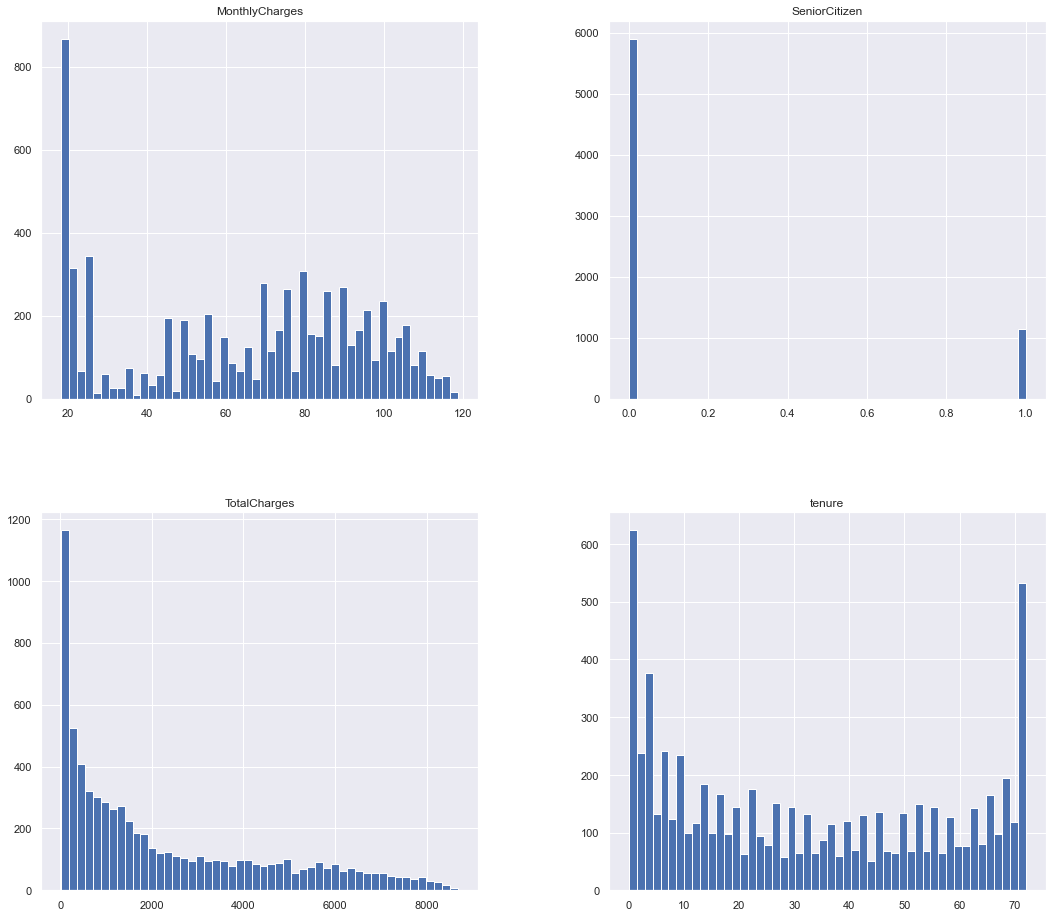

In [145]:
## Visualise the data

customer=customer.drop(columns="customerID")

customer.hist(bins=50, figsize=(18,16))
plt.show()

notes

MonthlyCharges - There are many people with a monthly charge of less than 20.

SeniorCitizen - We see there are afew customers who senior citizens compared to non-senior citizens.

TotalCharges - There are many customers at the lowest level of charges.

Tenure - There are many new customers, as there is a spike at the 0 to 2 value. The tenure is capped at 72 since it spikes at 72.

The histograms are using different scales.

In [147]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.816378
std,0.368612,24.559481,30.090047,2266.712864
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The values shown on table match with those on the graphs above.

Tenure - the minimum is zero and the maximum is 72.

MonthlyCharges - The monthly charges have a minimum of 18.25. The mean is about 65 and the median is 70.

TotalCharges - The minimum Total Charge is 18.80, however the maximum is goes up to 8684.

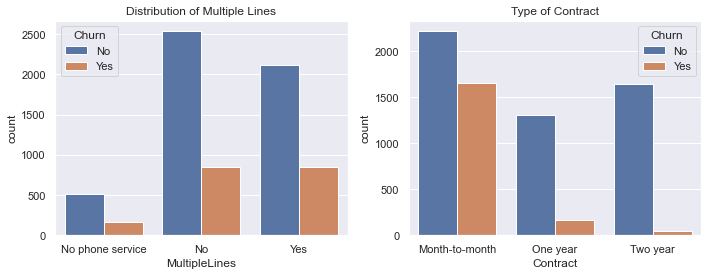

In [159]:
# Visualization

fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="MultipleLines", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Multiple Lines")

seaborn.countplot(x="Contract", hue="Churn", data=customer, ax=axs[1])

plt.title("Type of Contract")

fig.tight_layout()

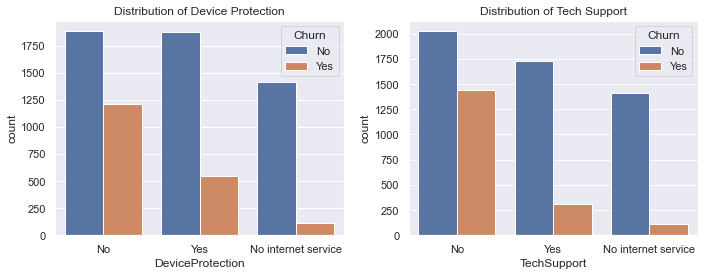

In [156]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="DeviceProtection", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Device Protection")

seaborn.countplot(x="TechSupport", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Tech Support")

fig.tight_layout()

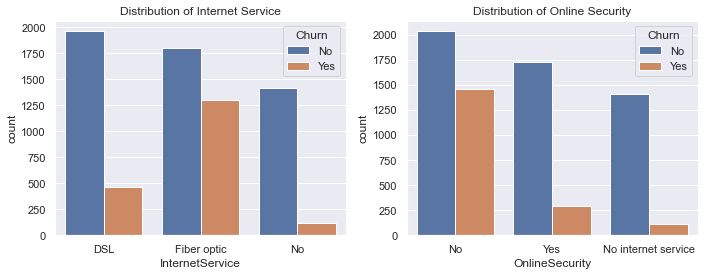

In [157]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="InternetService", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Internet Service")

seaborn.countplot(x="OnlineSecurity", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Online Security")

fig.tight_layout()

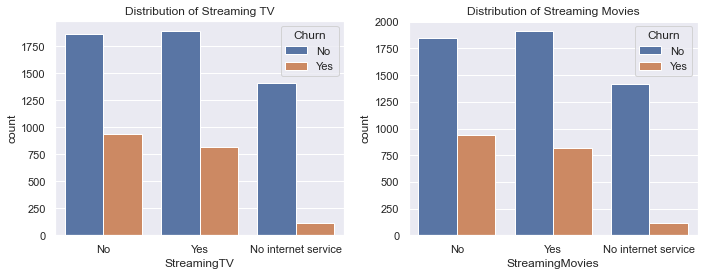

In [158]:
# More visualization
fig, axs = plt.subplots(1,2, figsize=(10,4))
seaborn.countplot(x="StreamingTV", hue="Churn", data=customer, ax=axs[0])
axs[0].set_title("Distribution of Streaming TV")

seaborn.countplot(x="StreamingMovies", hue="Churn", data=customer, ax=axs[1])
plt.title("Distribution of Streaming Movies")

fig.tight_layout()

### Notes

From the graphs above:

MultipleLines - The graph shows that was of those that had phone service, almost the same number of customer churned, irrespective of whether they had multiple lines or not. 

Contract - more customers with month-to-month contract churned more than those with one or two year contract. Customer with the Two year contract had the least churn, maybe because the customers were tied by the contract. 

Device Protect and TechSupport - However, having Device protection and Tech Support played an important role in whether a customer churned or not. There was a high number of customers without device protection who churned compared to those that had device protection. Similarly, way more customers without Tech Support churned compared to those that had Tech Support.

Internet Service - Many customers using Fiber Optic internet churned. 

OnlineSecurity - Many customers without Online Security churned or exited. 

StreamingTV and StreamingMovies - Of the customers who had subscribed for internet service those who did not stream TV or movies churned more than those who stream TV or movies. 


# Cleaning and Preparation

## Cleaning Data

#### Missing Values

In [2]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no missing values.

The column `MonthlyCharges` is a float. The columns `SeniorCitizen` and `tenure` are integers. The rest of the columns are objects.

The column `TotalCharges` is put in as a object it supposed to be a float. So that will be changed.

#### Remove Whitespace

In [5]:
# Remove white space in columns

customer.MultipleLines=customer.MultipleLines.str.strip().str.replace(' ','')

In [6]:
# Remove white space from columns

cols = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i in cols:
    customer[i] = customer[i].str.strip().str.replace(' ','')

In [7]:
# Check columns

customer["MultipleLines"].value_counts()

No                3390
Yes               2971
Nophoneservice     682
Name: MultipleLines, dtype: int64

In [8]:
customer["TechSupport"].value_counts()

No                   3473
Yes                  2044
Nointernetservice    1526
Name: TechSupport, dtype: int64

Now we see that there is no white space.

In [9]:
customer.Contract=customer.Contract.str.strip().str.replace(' ','')

In [10]:
# Remove parenthesis
customer.PaymentMethod=customer.PaymentMethod.str.replace(r"\(.*\)",'').str.strip()

In [11]:
# replace long descriptions with shorter ones

customer.PaymentMethod=customer.PaymentMethod.str.strip().str.replace('Electronic check','Electronic')
customer.PaymentMethod=customer.PaymentMethod.str.strip().str.replace('Mailed check','Mail')
customer.PaymentMethod=customer.PaymentMethod.str.strip().str.replace('Bank transfer','Banktransfer')
customer.PaymentMethod=customer.PaymentMethod.str.strip().str.replace('Credit card','Credit')

In [12]:
customer["PaymentMethod"].value_counts()

Electronic      2365
Mail            1612
Banktransfer    1544
Credit          1522
Name: PaymentMethod, dtype: int64

In [13]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,Oneyear,No,Mail,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mail,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,...,Yes,Yes,No,No,Oneyear,No,Banktransfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiberoptic,No,...,No,No,No,No,Month-to-month,Yes,Electronic,70.70,151.65,Yes


#### Change from Object to Float

The `TotalCharges` column needs to be changed from object to float.

#### Anomalies

First we need to correct the anomaly

In [14]:
# Find anomaly
customer.iloc[488].TotalCharges

' '

In [15]:
customer.loc[(488)]

customerID              4472-LVYGI
gender                      Female
SeniorCitizen                    0
Partner                        Yes
Dependents                     Yes
tenure                           0
PhoneService                    No
MultipleLines       Nophoneservice
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                    No
DeviceProtection               Yes
TechSupport                    Yes
StreamingTV                    Yes
StreamingMovies                 No
Contract                   Twoyear
PaperlessBilling               Yes
PaymentMethod         Banktransfer
MonthlyCharges               52.55
TotalCharges                      
Churn                           No
Name: 488, dtype: object

In [16]:
# We fill in the missing value with the Monthly Charge value

customer["TotalCharges"]=customer["TotalCharges"].replace(' ',"52.55")

In [17]:
# Check the value again
# We see it is now filled

customer.iloc[488].TotalCharges

'52.55'

In [18]:
# Proceed to change from object to float

customer["TotalCharges"]=pd.to_numeric(customer["TotalCharges"])

In [144]:
customer.TotalCharges.dtypes

dtype('float64')

Now we see that the column `TotalCharges` is now float and not object.

#### Outliers

Check for outliers. The graphs below show there are no outliers.

SeniorCitizen        AxesSubplot(0.125,0.125;0.168478x0.755)
tenure            AxesSubplot(0.327174,0.125;0.168478x0.755)
MonthlyCharges    AxesSubplot(0.529348,0.125;0.168478x0.755)
TotalCharges      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

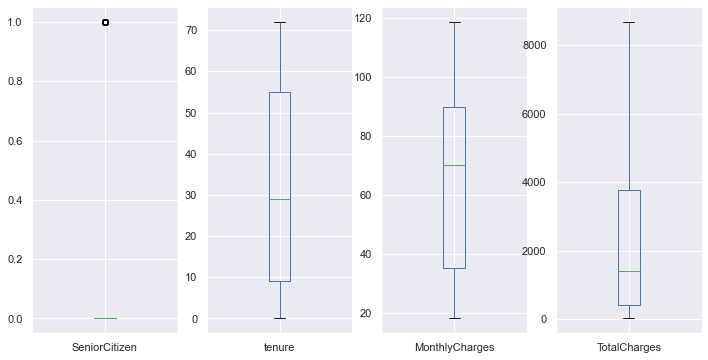

In [18]:
customer.plot(kind="box", figsize=(12,6), layout=(1,4), subplots=True)

## Preparation

#### Features

#### Drop Columns

The columns `CustomerID` is not needed to determine if a customer churns or not and there will be deleted.

In [19]:
customer=customer.drop('customerID', axis=1)

In [20]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mail,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mail,53.85,108.15,Yes
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electronic,70.70,151.65,Yes


### Define X and y variables

Our target variable is the column "Churn". That is if a customer will churn or not.

In [21]:
y = customer.loc[:, "Churn"]

In [22]:
X = customer.loc[:, "gender":"TotalCharges"]

In [23]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mail,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mail,53.85,108.15
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer,42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Month-to-month,Yes,Electronic,70.70,151.65


### Transform Data

#### Transform Y

Y has categorical data. Yes for customer churned and No for did not churn.

In [24]:
# convert Target data into numeric data using Label Encoder

from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
# Fit the labelencoder

le.fit(y)

LabelEncoder()

In [27]:
y=le.transform(y)

In [28]:
y

array([0, 0, 1, ..., 0, 1, 0])

### OneHot Encoder

X data is converted from categorical data to numerica data using OneHot Encoder. The OneHot Encoder ensures that the different categories do not get ordered or ranked.

All the columns except `SeniorCitizen`, `tenure`, `MonthlyCharges` and `TotalCharges` are objects.

In [29]:
# import OneHot Encoder

from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder

In [30]:
# instantiate

categorical_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
numeric_columns=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

columntransformer=make_column_transformer((OneHotEncoder(drop='if_binary'),categorical_columns),remainder="passthrough")

In [31]:
columntransformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [32]:
X = columntransformer.transform(X)

Looking at X it is now transformed to a numpy array.

In [33]:
# Looking at X
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.4000e+01, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.1000e+01, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.6000e+01, 1.0565e+02,
        6.8445e+03]])

### Splitting Data

In [34]:
# Create Train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1, stratify=y)

In [35]:
X_train.shape

(5634, 40)

In [36]:
X_test.shape

(1409, 40)

In [37]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([4139, 1495]))

In [38]:
4139/(4139+1495)

0.7346467873624423

In [39]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1035,  374]))

### Scaling the data

In [39]:
# Use the Standard Scaler from sklearn

from sklearn.preprocessing import StandardScaler

In [40]:
sd = StandardScaler(with_mean=False)

sd.fit(X_train) # fit the training data

StandardScaler(with_mean=False)

In [41]:
sd.transform(X_train)

sd.transform(X_test)

array([[2.00002835, 0.        , 0.        , ..., 0.16276528, 0.68925801,
        0.03698239],
       [2.00002835, 0.        , 0.        , ..., 0.08138264, 1.63990131,
        0.040228  ],
       [0.        , 0.        , 0.        , ..., 2.36009658, 3.17325067,
        2.56898415],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04069132, 1.85799987,
        0.0246402 ],
       [0.        , 2.00121136, 2.18671771, ..., 2.92977507, 1.79140489,
        1.74532571],
       [0.        , 2.00121136, 2.18671771, ..., 0.        , 2.69210196,
        0.02320507]])

# Modeling

This is a Classification problem. The data set was modeled using different models, these include Logistic Regression, Decision Tree, Random Forest, K-nearest neighbor and Support Vector Machines. The models were chosen because they are suitable for modeling a classification problem. 

The baseline was calculated using using the target data to get the Dummy variable accuracy rate. The Dummy variable accuracy rate is 0.73.

The metric used was the accuracy_score. Another metric used was confusion matrix. These metrics were used because they are  recommended for a classification.

#### Logistic Regression

In [42]:
# from sklearn import Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# instantiate

logreg = LogisticRegression(random_state=42)

In [44]:
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [93]:
# Check the intercept

logreg.intercept_

array([-0.16035805])

In [48]:
# Score # Accuracy

logreg.score(X_train, y_train)

0.8040468583599574

In [49]:
# Predict some data

print("Predictions:",logreg.predict(X_test[0:10]))

print("Actual", y_test[0:10])

Predictions: [0 0 0 0 0 1 0 1 1 0]
Actual [0 1 0 0 0 1 0 1 0 0]


The prediction is relatively good though the model missed out on the second last value. 

In [50]:
predlr = logreg.predict(X_test)

In [53]:
# Score ## Accuracy
lr_score = accuracy_score( y_test, predlr)

lr_score

0.8119233498935415

In [66]:
lr_cm= confusion_matrix(y_test,predlr)
lr_cm

array([[939,  96],
       [169, 205]], dtype=int64)

In [57]:
# True positives and true negatives
939+205

1144

Text(30.5, 0.5, 'Actual')

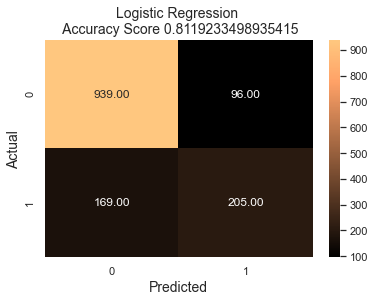

In [73]:
# Plot the Confusion Matrix
seaborn.heatmap(lr_cm, annot=True,fmt =".2f", cmap=plt.cm.copper)
plt.title("Logistic Regression \n Accuracy Score {0}".format(lr_score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

The Logistic Regression model has an accuracy score of 0.81. Of the 1409 predictions the model predicted 1144 correctly.

#### Decision Tree

In [107]:
# from sklearn import Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [108]:
# instantiate

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
#Score accuracy

dtree.score(X_train, y_train)

0.9978700745473909

In [77]:
# Predict some data

print("Predictions:", dtree.predict(X_test[0:10]))

print("Actual", y_test[0:10])

Predictions: [0 1 0 0 0 0 0 1 1 0]
Actual [0 1 0 0 0 1 0 1 0 0]


The model missed out on two values, however we will use this as baseline.

In [78]:
dtree_pred = dtree.predict(X_test)

In [109]:
# Score ## Accuracy
dtree_score = accuracy_score( y_test, dtree_pred)

dtree_score

0.7409510290986515

In [110]:
cm_dtree= confusion_matrix(y_test,dtree_pred)

cm_dtree

array([[856, 179],
       [186, 188]], dtype=int64)

In [170]:
# True positives and true negatives
856+188

1044

Text(30.5, 0.5, 'Actual')

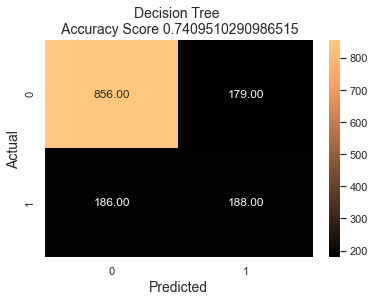

In [111]:
# Plot confusion Matrix
seaborn.heatmap(cm_dtree, annot=True,fmt =".2f", cmap=plt.cm.copper)
plt.title("Decision Tree \n Accuracy Score {0}".format(dtree_score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

The Decision Tree model has an accuracy score of 0.74. Of the 1409 predictions the model predicted 1044 correctly.

#### Random Trees

In [81]:
# import Random Forest Classifier from Sklearn

from sklearn.ensemble import RandomForestClassifier

In [82]:
# instantiate

rforest = RandomForestClassifier(n_jobs=2, max_features='auto', max_depth=10, random_state=42)

rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=2, random_state=42)

In [95]:
# Accuracy score on train data

rforest.score(X_train, y_train)

0.8780617678381256

In [96]:
# Predict some data

print("Predictions:",rforest.predict(X_test[0:10]))

print("Actual", y_test[0:10])

Predictions: [0 1 0 0 0 1 0 0 1 0]
Actual [0 1 0 0 0 1 0 1 0 0]


The model missed out on two values, however we will use this as baseline.

In [100]:
rforest_pred = rforest.predict(X_test)

In [103]:
# Score ## Accuracy
rforest_score = accuracy_score( y_test, rforest_pred)

rforest_score

0.8090844570617459

In [106]:
cm_rforest=confusion_matrix(y_test,rforest_pred)

cm_rforest

array([[944,  91],
       [178, 196]], dtype=int64)

In [171]:
# True positives and true negatives
944+196

1140

Text(30.5, 0.5, 'Actual')

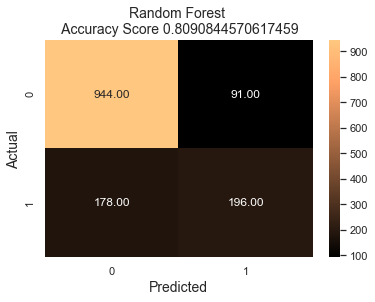

In [113]:
# Plot confusion Matrix
seaborn.heatmap(cm_rforest, annot=True,fmt =".2f", cmap=plt.cm.copper)
plt.title("Random Forest \n Accuracy Score {0}".format(rforest_score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

The Random Forest model has an accuracy score of about 0.81. Of the 1409 predictions the model predicted 1140 correctly.

### K-Nearest Neighbors

In [103]:
# get k-nearest neighbors from sklearn

from sklearn.neighbors import KNeighborsClassifier

In [104]:
# instantiate

knn =  KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
# Check for accuracy

knn.score(X_train, y_train)

0.8285410010649628

In [126]:
# Predict some data

print("Predictions:",knn.predict(X_test[0:10]))

print("Actual", y_test[0:10])

Predictions: [0 1 0 0 0 1 0 1 1 0]
Actual [0 1 0 0 0 1 0 1 0 0]


The model seems to perform relatively well though it missed out on one value. 

In [127]:
knn_pred = knn.predict(X_test)

In [130]:
# Score ## Accuracy
knn_score = accuracy_score( y_test, knn_pred)

knn_score

0.7686302342086586

In [132]:
cm_knn= confusion_matrix(y_test,knn_pred)
         
cm_knn

array([[912, 123],
       [203, 171]], dtype=int64)

In [172]:
# True positives and true negatives
912+171

1083

Text(30.5, 0.5, 'Actual')

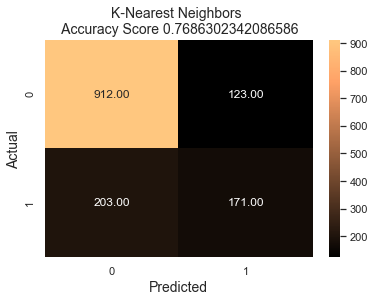

In [165]:
# Plot confusion Matrix
seaborn.heatmap(cm_knn, annot=True,fmt =".2f", cmap=plt.cm.copper)
plt.title("K-Nearest Neighbors \n Accuracy Score {0}".format(knn_score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

The K-nearest neighbors model has an accuracy score of 0.76. Of the 1409 predictions the model predicted 1083 correctly.

### Support Vector Machine

In [54]:
# from sklearn.svm import svc
from sklearn.svm import SVC

In [55]:
svc = SVC(kernel='linear')

In [56]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [58]:
# Score ## Accuracy

svc.score(X_train,y_train)

0.7957046503372383

In [151]:
# Predict some data

print("Predictions:",svc.predict(X_test[0:10]))

print("Actual", y_test[0:10])

Predictions: [0 0 0 0 0 1 0 0 1 0]
Actual [0 1 0 0 0 1 0 1 0 0]


The model missed out on three values. It is bit working great right now. 
However, we will use it as a baseline.

In [59]:
svc_pred = svc.predict(X_test)

In [62]:
# Score ## Accuracy
svc_score = accuracy_score( y_test, svc_pred)

svc_score

0.7863733144073811

In [162]:
cm_svc = confusion_matrix(y_test,svc_pred)

cm_svc

array([[953,  82],
       [219, 155]], dtype=int64)

In [65]:
953+155

1108

The Support Vector Machine model has an accuracy score of 0.79. 
Of the 1409 predictions the model predicted 1108 correctly.

Text(30.5, 0.5, 'Actual')

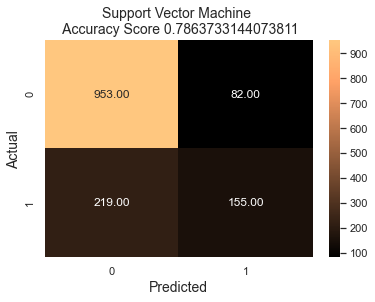

In [164]:
# Plot confusion Matrix
seaborn.heatmap(cm_svc, annot=True,fmt =".2f", cmap=plt.cm.copper)
plt.title("Support Vector Machine \n Accuracy Score {0}".format(svc_score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

#### _notes_

Before comparing the models using Cross Validation. The Logistic Regression model with regularization performed the best on the test data with an accuracy score of 0.81. It also had the highest correct predictions. Of the 1409 values in the test data, it correctly predicted 1144. The Random Forest Model followed very closely with an accuracy score of 0.81 and number of correct predicts is 1140 out of the total 1409 values in the test data.


## Fine Tuning the Parameters

### Cross Validation

The 5-fold Cross Validation was used to compare the models. The Logistic Regression model performed the best with an accuracy_score of 0.803 and a standard deviation of +/- 0.010. See the table below under _model evaluation_.

#### Cross Validation for Logistic Regression

In [176]:
# Use the cross_validation from sklearn
# fivefold crossvalidation

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

scoring={'accuracy':make_scorer(accuracy_score)}

logreg=LogisticRegression(max_iter=1000)

logreg_scores=cross_validate(logreg, X_train, y_train, cv=5, scoring=scoring)

logreg_scores
def display_scores(logreg_scores):
    print("Scores:",logreg_scores['test_accuracy'])
    print("Mean:",logreg_scores['test_accuracy'].mean())
    print("StandardDeviation:",logreg_scores['test_accuracy'].std())
display_scores(logreg_scores)

Scores: [0.79946761 0.79236912 0.8216504  0.7985803  0.80728242]
Mean: 0.803869970260094
StandardDeviation: 0.010073919818915181


#### Cross Validation for Decision Tree

In [178]:
# Cross Validate using accuracy_score

treescores=cross_validate(dtree, X_train, y_train, cv=5, scoring=scoring)

display_scores(treescores)

Scores: [0.72049689 0.71428571 0.75244011 0.72759539 0.72468917]
Mean: 0.7279014532680013
StandardDeviation: 0.013059661658321571


#### Cross Validation for Random Forest

In [187]:
# Cross validate

rforestscores=cross_validate(rforest, X_train, y_train, cv=5, scoring=scoring)

display_scores(rforestscores)

Scores: [0.79414374 0.79148181 0.81721384 0.79236912 0.79396092]
Mean: 0.7978338883626661
StandardDeviation: 0.009740761750911148


#### Cross Validation for K-Nearest Neightbors

In [188]:
# Cross validate

knnscores=cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)

display_scores(knnscores)

Scores: [0.76220053 0.75066548 0.77196096 0.73380657 0.75932504]
Mean: 0.7555917169555288
StandardDeviation: 0.012840769526328722


#### Cross Validation for SVC

In [181]:
# Cross validate

svc_scores=cross_validate(svc, X_train, y_train, cv=5, scoring=scoring)

display_scores(svc_scores)

Scores: [0.79148181 0.78793256 0.81100266 0.78793256 0.80373002]
Mean: 0.7964159236943676
StandardDeviation: 0.009322544218499578


#### Model Evaluation
After carrying out the 5-fold cross validation the following accuracy scores and the standard deviation were obtained:

In [191]:
Model_comparison_CrossVal = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-nearest neighbor','Support Vector Machine'],
    'Accuracy_Score':[logreg_scores['test_accuracy'].mean(),treescores['test_accuracy'].mean(),rforestscores['test_accuracy'].mean(),knnscores['test_accuracy'].mean(),svc_scores['test_accuracy'].mean()],
    'Standard Deviation':[logreg_scores['test_accuracy'].std(),treescores['test_accuracy'].std(),rforestscores['test_accuracy'].std(),knnscores['test_accuracy'].std(),svc_scores['test_accuracy'].std()],
})

Model_comparison_CrossVal

,Model,Accuracy_Score,Standard Deviation
0,Logistic Regression,0.803870,0.010074
1,Decision Tree,0.727901,0.013060
2,Random Forest,0.797834,0.009741
3,K-nearest neighbor,0.755592,0.012841
4,Support Vector Machine,0.796416,0.009323


The 5-fold Cross Validation was used to compare the models. The Logistic Regression model performed the best with an accuracy_score of 0.80 and a standard deviation of +/- 0.010.

### Grid Search CV

For each model different hyperparameters were tried so as to improve the performance of each model.

#### GridSearchCV for Logistic Regression with Regularization

In [45]:
# import GridSearchCV

from sklearn.model_selection import GridSearchCV

In [46]:
# prepare grid
# (3x2) combinations of hyperparameters
# solver =liblinear and c same with penalty
grid = [{'C':[0.01,0.1,1], 'penalty':['l1','l2'],'solver':['liblinear']},
   #then try 
        {'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
         ]

logreg = LogisticRegression(random_state=50, max_iter=5000)

In [47]:
# instantiate
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid= grid, cv=5, return_train_score=True)

grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=50),
             param_grid=[{'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             return_train_score=True)

In [62]:
pd.DataFrame(grid_search_logreg.cv_results_)[['param_C','param_penalty','mean_test_score','std_test_score']]

,param_C,param_penalty,mean_test_score,std_test_score
0,0.01,l1,0.788607,0.008577
1,0.01,l2,0.804403,0.009211
2,0.1,l1,0.806354,0.009931
3,0.1,l2,0.805290,0.010887
4,1,l1,0.804048,0.010041
5,1,l2,0.803693,0.010229
6,0.01,l2,0.804225,0.009186
7,0.1,l2,0.804225,0.011687
8,1,l2,0.803870,0.010074


In [63]:
# Accuracy score using the best estimator
final_logregscore = grid_search_logreg.best_score_

final_logregscore

0.8063544423097836

In [64]:
grid_search_logreg.best_estimator_

LogisticRegression(C=0.1, max_iter=5000, penalty='l1', random_state=50,
                   solver='liblinear')

Interestingly, the Logistic Regression model remained more or less the same even after fine tuning with the GridSearch CV. The score final score after using the best estimator was 0.806 =/- 0.01, previously 0.803 =/- 0.01 using the cross validation.

 #### GridSearchCV - Decision Tree

In [110]:
# Combination of hyperparameters
dtree_grid = [
    # Try  combinations of hyperparameters
    {'min_samples_leaf':[5],'max_depth':[3,5,7],'criterion':['entropy','gini']}
]    

dtree = DecisionTreeClassifier(random_state=100)

grid_search_dtree = GridSearchCV(estimator=dtree, param_grid = dtree_grid, cv=5, return_train_score=True)

grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 5, 7], 'min_samples_leaf': [5]}],
             return_train_score=True)

In [204]:
pd.DataFrame(grid_search_dtree.cv_results_)[['param_min_samples_leaf','param_max_depth','param_criterion','mean_test_score','std_test_score']]

,param_min_samples_leaf,param_max_depth,param_criterion,mean_test_score,std_test_score
0,5,3,entropy,0.791091,0.005781
1,5,5,entropy,0.792689,0.008736
2,5,7,entropy,0.781331,0.012035
3,5,3,gini,0.790736,0.006370
4,5,5,gini,0.790382,0.009204
5,5,7,gini,0.777603,0.017054


In [120]:
# Accuracy score using the best estimator
final_dtscore = grid_search_dtree.best_score_

final_dtscore

0.792689058015669

After using the GridSearch CV there is a big improvement in the performance of the accuracy of the Decision Tree model from 0.729 =/- 0.013 using cross validation to 0.792 +/- 0.006.

 #### GridSearchCV - Random Forest

In [83]:
# Combination of hyperparameters
rforest_grid = [
    # Try  combinations of hyperparameters
    {'n_estimators':[10,200,300], 'max_features':['auto','sqrt','log2'],'max_depth':[10,15,20],'criterion':['entropy','gini']}
]    

rforest = RandomForestClassifier(n_jobs=2, random_state=42)

grid_search_rforest = GridSearchCV(estimator=rforest, param_grid = rforest_grid, cv=5, return_train_score=True)

grid_search_rforest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=2, random_state=42),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [10, 15, 20],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 200, 300]}],
             return_train_score=True)

In [217]:
pd.DataFrame(grid_search_rforest.cv_results_)[['param_criterion','param_max_depth','param_max_features','param_n_estimators','mean_test_score','std_test_score']]

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score
0,entropy,10,auto,10,0.789494,0.015091
1,entropy,10,auto,200,0.797124,0.011888
2,entropy,10,auto,300,0.797124,0.012744
3,entropy,10,sqrt,10,0.789494,0.015091
4,entropy,10,sqrt,200,0.797124,0.011888
5,entropy,10,sqrt,300,0.797124,0.012744
6,entropy,10,log2,10,0.790735,0.011594
7,entropy,10,log2,200,0.799254,0.010442
8,entropy,10,log2,300,0.798189,0.011503
9,entropy,15,auto,10,0.784877,0.012135


In [114]:
# Best accuracy score
final_rfscore = grid_search_rforest.best_score_

final_rfscore

0.7996088264636305

The accuracy score for the Random Forest model remained more or less the same even after fine tuning with GridSearch CV an accuracy score is 0.7996 +/- 0.011. The initial accuracy score using cross validation was 0.797 +/- 0.01. 

#### GridSearchCV - K-Nearest Neighbor

In [106]:
# Combination of hyperparameters
knn_grid = [
    # Try  combinations of hyperparameters
    {'leaf_size':[35,40],'n_neighbors':[7,9]}
]    

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn, param_grid = knn_grid, cv=5, return_train_score=True)

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [35, 40], 'n_neighbors': [7, 9]}],
             return_train_score=True)

In [220]:
pd.DataFrame(grid_search_knn.cv_results_)[['param_leaf_size','param_n_neighbors','mean_test_score','std_test_score']]

,param_leaf_size,param_n_neighbors,mean_test_score,std_test_score
0,35,7,0.762159,0.010246
1,35,9,0.768018,0.013763
2,40,7,0.761804,0.010238
3,40,9,0.768373,0.013766


In [115]:
# Final accuracy score

final_knnscore = grid_search_knn.best_score_

final_knnscore

0.7683729418866163

There was a slight improvement in the best score for K-nearest neighbors after fine tuning with the GridSearch CV. It rose from 0.756 +/- 0.101 with cross validation to 0.768 +/- 0.014.

 #### GridSearchCV - SVM

In [64]:
# Combination of hyperparameters
svc_grid = [
    # Try  combinations of hyperparameters
    {'C':[0.1,1,10],'kernel':['rbf','linear']}
]    

svc = SVC()

grid_search_svc = GridSearchCV(estimator=svc, param_grid = svc_grid, cv=5, return_train_score=True, verbose=2)

grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ C=0.1, kernel=rbf, total=   1.6s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ................................ C=0.1, kernel=rbf, total=   1.5s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................................ C=0.1, kernel=rbf, total=   1.6s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................................ C=0.1, kernel=rbf, total=   1.7s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................................ C=0.1, kernel=rbf, total=   1.6s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total= 9.9min
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total= 6.8min
[CV] C=0.1, kernel=linear ............................................
[CV] ............................. C=0.1, kernel=linear, total=10.9min
[CV] C=0.1, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 253.2min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}],
             return_train_score=True, verbose=2)

In [67]:
pd.DataFrame(grid_search_svc.cv_results_)[['param_C','param_kernel','mean_test_score','std_test_score']]

,param_C,param_kernel,mean_test_score,std_test_score
0,0.1,rbf,0.734647,0.000094
1,0.1,linear,0.800143,0.004736
2,1,rbf,0.734647,0.000094
3,1,linear,0.796416,0.009323
4,10,rbf,0.761093,0.005267
5,10,linear,0.791623,0.010897


In [70]:
# Final accuracy score

final_svcscore = grid_search_svc.best_score_

final_svcscore

0.8001429469772308

There was a slight improvement in the best score for Support Vector Machine after fine tuning with the GridSearch CV. It moved from 0.796 +/- 0.009 using cross validation to 0.800 +/- 0.005.

In [121]:
# Final Model Comparison

Model_comparison = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-nearest neighbor','Support Vector Machine'],
    'Score':[final_logregscore,final_dtscore,final_rfscore,final_knnscore, final_svcscore],  
})

Model_comparison

,Model,Score
0,Logistic Regression,0.806354
1,Decision Tree,0.792689
2,Random Forest,0.799609
3,K-nearest neighbor,0.768373
4,Support Vector Machine,0.800143


# Presentation of Solution

### Final Model

#### Final - LogisticRegression with regularization

In [48]:
# Final accuracy score

final_logreg = grid_search_logreg.best_score_

final_logreg

0.8063544423097836

In [49]:
gridsearchlr = grid_search_logreg.best_estimator_

final_lrpred = gridsearchlr.predict(X_test)

In [50]:
cm_lrfinal = confusion_matrix(y_test,final_lrpred)

cm_lrfinal

array([[934, 101],
       [170, 204]], dtype=int64)

In [51]:
934 + 204

1138

In [52]:
final_lrscore = gridsearchlr.score(X_test, y_test)

Text(30.5, 0.5, 'Actual')

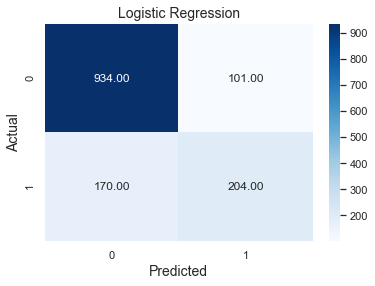

In [53]:
seaborn.heatmap(cm_lrfinal, annot=True,fmt =".2f", cmap=plt.cm.Blues)
plt.title("Logistic Regression", fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

### Conclusion

The goal of the project was predict which customer will churn or not churn using a classification model with an accuracy score above 0.73. After fine tuning using grid search cv all the models had a accuracy score of over 0.73. After fine tuning, the best and final model was found to be the Logistic Regression Model, this is because it had the highest accuracy score of 0.806 and a standard deviation of +/- 0.01 with C=0.1.

The Telco customer churn dataset was modeled using five different models. These models are Logistic Regression, Decision Tree, Random Forest, K-Nearest Neigbors and Support Vector Machines. 

The results are reliable because first the models were compared using 5-fold cross validation. Then second, a further fine tuning was done with Grid Search CV using different hyperparameters. 

The project is important for the business because the Telco business can predict the customers who are likely to churn or not with relatively good accuracy. In addition, using the confusion matric this final Logistic Regression model was able to predict 1138 values correctly of the 1409 values in the test data. This means that it was able to accurately predict 1138 of the customers who would churn or not churn out of 1409 customers. That is a good number of customers. The business can use this information to improve their services to customers. 

### Research Questions
 - What do we learn from exploratory data analysis?

Based on the exploratory data analysis of the customers who had internet services, those who churned the most were using fiber optics. Therefore, the business should consider improving their fiber optic services. From the EDA we also saw that of the customers who used internet service the highest number of those who churned did not have device protection, tech support or online security. The business should therefore consider offering these services for free or at a lower rate to their customers. The customers with the month-to-month contract churned the most, which is expected since they are not tied to a long term contract. 

- What happened to the accuracy score when the grid search cross validation was used?

After using the grid search Cross Validation there was an slight improvement on the accuracy score of all the models compared to their results after the Cross Validation. The Decision Tree had the greatest improvement. Though overall, the Logistic Regression model had the highest accuracy score. 

 - What is the best model to use?
 
The Logistic Regression model was the best model as it had the highest accuracy score 0.806 and a standard deviation of +/- 0.01 with C=01, penalty=l1. It had the highest score after using the 5-fold cross validation and was still the highest after using the GridSearch CV. 

### Limitations
With further research calculation of the [Customer Lifetime Value](https://quickbooks.intuit.com/ca/resources/profit-loss/customer-acquisition-cost-lifetime-value/) would be done and then an evaluation of how this affects the prediction. 


### Expectations
The results are above expectations because not only did we model the data using different models, but also used the 5-fold cross validation to compare the models. Then, went further to optimize the models using GridSearch CV. In data preparation, the onehot encoding was used to make use that there was no bias created in the data by giving the categories ordinal values. 

### References

- [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

- [Stackoverflow](https://stackoverflow.com/questions)

- [Pandas](https://pandas.pydata.org/docs/user_guide/text.html?highlight=strip%20objects)

- [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

- [Customer Retention](https://en.wikipedia.org/wiki/Customer_retention).Wikipedia.

- [The Price is Right:Incentives that Stimulates switching behaviour](https://www.nielsen.com/us/en/insights/article/2013/the-price-is-right-incentives-that-stimulate-switching-behavior/) Nov 18 2013. NeilsonIQ.
- [How loyal are your customers](https://www.nielsen.com/us/en/insights/report/2013/how-loyal-are-your-customers/) 2013. NeilsonIQ.

- [Customer Lifetime Value](https://quickbooks.intuit.com/ca/resources/profit-loss/customer-acquisition-cost-lifetime-value/)